In [22]:
from sklearn import svm,metrics
from sklearn.neighbors import KNeighborsClassifier # 븐류
from sklearn.neighbors import KNeighborsRegressor # 회귀- 예측
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import glob, os.path, re

matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [3]:
perch_length =np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0])

perch_weight =np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0])


In [5]:
train_input, test_input, train_target, test_target = train_test_split(
     perch_length,perch_weight,random_state=42
)

In [6]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

다항회귀

In [7]:
# 특성 : 제곱을 자동으로 만들어주는 라이브러리
from sklearn.preprocessing import PolynomialFeatures

In [11]:
train_input

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ],
       [25. ],
       [40. ],
       [39. ],
       [43. ],
       [22. ],
       [20. ],
       [22. ],
       [24. ],
       [27.5],
       [43. ],
       [40. ],
       [24. ],
       [21. ],
       [27.5],
       [40. ],
       [32.8],
       [26.5],
       [36.5],
       [13.7],
       [22.7],
       [15. ],
       [37. ],
       [35. ],
       [28.7],
       [23.5],
       [39. ],
       [21. ],
       [23. ],
       [22. ],
       [44. ],
       [22.5],
       [19. ],
       [37. ],
       [22. ],
       [25.6],
       [42. ],
       [34.5]])

In [16]:
df = pd.DataFrame([perch_length,perch_weight])
df = df.T
df

df[2] = df[0]**2

In [17]:
df

,0,1,2
0,8.4,5.9,70.56
1,13.7,32.0,187.69
2,15.0,40.0,225.00
3,16.2,51.5,262.44
4,17.4,70.0,302.76
5,18.0,100.0,324.00
6,18.7,78.0,349.69
7,19.0,80.0,361.00
8,19.6,85.0,384.16
9,20.0,85.0,400.00


In [19]:
#  직접 특성 추가
# 데이터 전처리 -  train, test 세트 구성
train_poly = np.column_stack([train_input**2,train_input])
test_poly = np.column_stack([test_input**2,test_input])

In [26]:
train_poly

array([[ 384.16,   19.6 ],
       [ 484.  ,   22.  ],
       [ 349.69,   18.7 ],
       [ 302.76,   17.4 ],
       [1296.  ,   36.  ],
       [ 625.  ,   25.  ],
       [1600.  ,   40.  ],
       [1521.  ,   39.  ],
       [1849.  ,   43.  ],
       [ 484.  ,   22.  ],
       [ 400.  ,   20.  ],
       [ 484.  ,   22.  ],
       [ 576.  ,   24.  ],
       [ 756.25,   27.5 ],
       [1849.  ,   43.  ],
       [1600.  ,   40.  ],
       [ 576.  ,   24.  ],
       [ 441.  ,   21.  ],
       [ 756.25,   27.5 ],
       [1600.  ,   40.  ],
       [1075.84,   32.8 ],
       [ 702.25,   26.5 ],
       [1332.25,   36.5 ],
       [ 187.69,   13.7 ],
       [ 515.29,   22.7 ],
       [ 225.  ,   15.  ],
       [1369.  ,   37.  ],
       [1225.  ,   35.  ],
       [ 823.69,   28.7 ],
       [ 552.25,   23.5 ],
       [1521.  ,   39.  ],
       [ 441.  ,   21.  ],
       [ 529.  ,   23.  ],
       [ 484.  ,   22.  ],
       [1936.  ,   44.  ],
       [ 506.25,   22.5 ],
       [ 361.  ,   19.  ],
 

In [21]:
train_poly.shape

(42, 2)

In [23]:
lr = LinearRegression()
lr.fit(train_poly,train_target)

LinearRegression()

In [25]:
# 50cm, 1500g - knr : 1033g, lr-선형회귀 : 1241g lr-다항회귀:1500g
predict = lr.predict([[50**2,50]])
predict

array([1573.98423528])

In [28]:
print(lr.coef_,lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


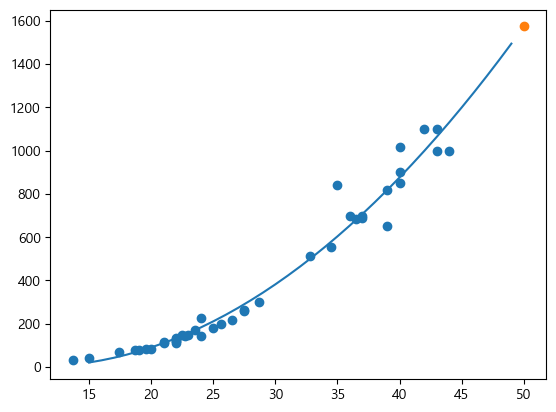

In [32]:
# 그래프 출력
# 선형회귀 : 15,50의 값을 넣어서 선을 그림
# 다항회귀 : 직선을 여러번 그려야함
plt.scatter(train_input, train_target)
x=np.arange(15,50)
plt.plot(x,(1.014*x**2+-21.55*x + 116.05)) # 기울기 * x**2 + 기울기 * x + y절편
plt.scatter(50,1574)

In [33]:
# 예측률
print("train 예측률 : ",lr.score(train_poly,train_target))
print("test 예측률 : ",lr.score(test_poly,test_target))

train 예측률 :  0.9706807451768623
test 예측률 :  0.9775935108325122
